# Greedy Algorithm
- 최적화(optimization) 문제를 해결하는 문제 방식 중 하나  
- 선택 과정에서 모든 데이터를 고려하지 않고 근시안적으로 욕심을 내어 최소(최대)값을 가진 데이터 선택
- 구간 스케줄링, 구간 분할, 초 증가 순서, 최소 신장 트리, 최단 경로, 허프만 코딩

## Task Scheduling
- 각 테스크는 시작과 종료 시각을 가진다.
- 태스크를 처리할 프로세서는 수행 시간이 겹치지 않게 태스크를 할당
- 그리디 알고리즘으로 최적해를 찾을 수 있는 태스크 스케줄링 문제 : 구간 스케줄링, 구간 분할 문제

### Interval Scheduling (구간 스케줄링)
- n개의 task와 1개의 processer
- 수행 시간이 겹치지 않게 가장 많은 태스크를 프로세서에 할당
- 어떤 태스크들은 수행되지 않을 수도 있다.

#### [예제] 동아리 미팅룸 배정
7개의 동아리가 토요일에 중앙도서관 미팅룸에서 회의하려고 요청하였다. 어떻게 하면 가장 많은 수의 동아리들이 미팅룸을 사용할 수 있을까?
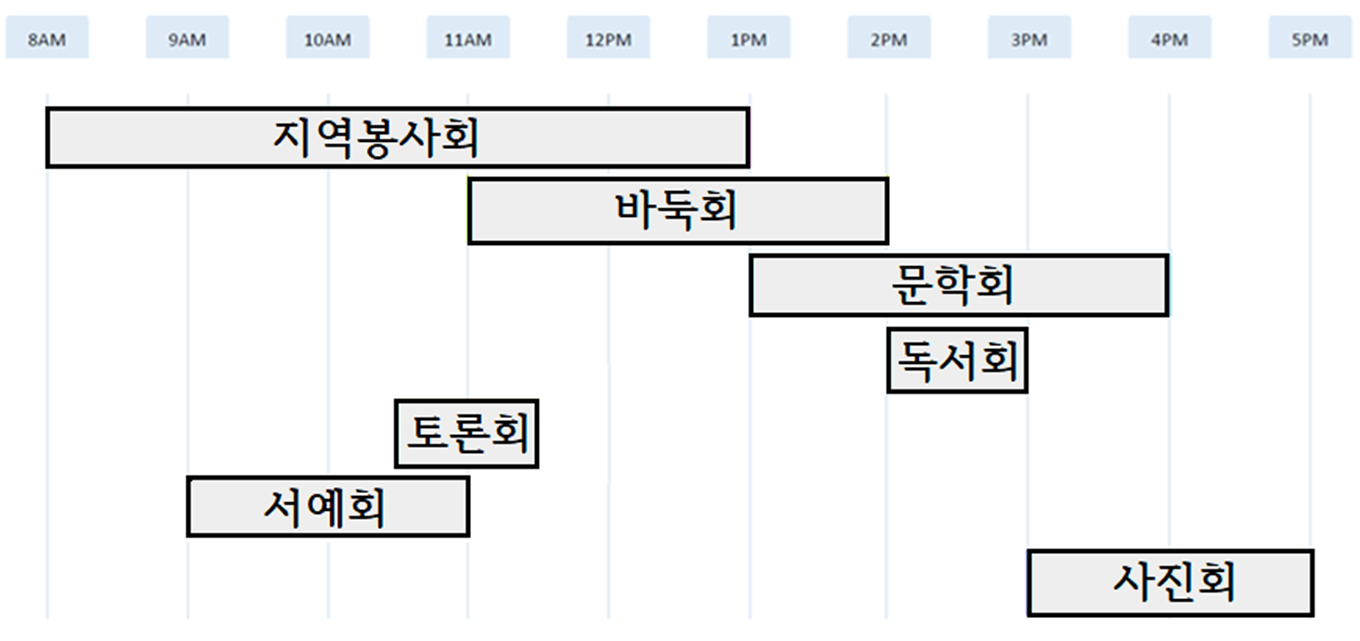

##### 구간 스케줄링 알고리즘
1. 종료 시각으로 정렬한다.
2. 가장 일찍 종료하는 동아리를 선택한다.
3. 다음 동아리의 시작 시각이 직전에 선택된 동아리의 종료 시각 이전이면 다음 동아리를 포기하고, 이후이면 다음 동아리를 선택한다.

In [6]:
# 구간 스케줄링 알고리즘 구현하기  Earliest Finish Time First
# 1. 종료 시각으로 정렬한다.
# 2. 가장 일찍 종료하는 동아리를 선택한다.
# 3. 다음 동아리의 시작 시각이 직전에 선택된 동아리의 종료 시각 이전이면
#    다음 동아리를 포기하고, 이후이면 다음 동아리를 선택한다.

a = [['지역봉사회', 8, 13], ['서예회', 9, 11], ['토론회', 10, 12], ['바둑회', 11, 14],
      ['문학회', 13, 16], ['독서회', 14, 15], ['사진회', 15, 17]]
a.sort(key= lambda t: t[2])

solution =[a[0]]
i=0
for j in range(1, len(a)):
    if a[j][1] >=a[i][2]:
        solution.append(a[j])
        i = j

print('선택된 동아리:', solution)

선택된 동아리: [['서예회', 9, 11], ['바둑회', 11, 14], ['독서회', 14, 15], ['사진회', 15, 17]]


##### 구간 스케줄링 수행 시간
1. 정렬 : O(nlogn)
2. 다음 task 배정 검사 (각 task당) : O(1)
3. 총 시간 : O(nlogn) + O(1)*n = O(nlogn)

### Interval Partitioning (구간 분할)
- n개의 태스크
- 최소의 프로세서를 사용
- 수행 시간이 겹치지 않게 모든 태스크를 프로세서에 배정

#### [예제] 모든 동아리에게 미팅룸을!
교내 동아리들이(또?) 토요일에 도서관 회의실 예약을 신청함. 각 동아리 미팅의 시작 시간과 종료 시각을 제출함.  
도서관은 모든 동아리의 미팅을 위해 최소의 회의실을 사용하여 미팅 스케줄을 정하려고 한다.
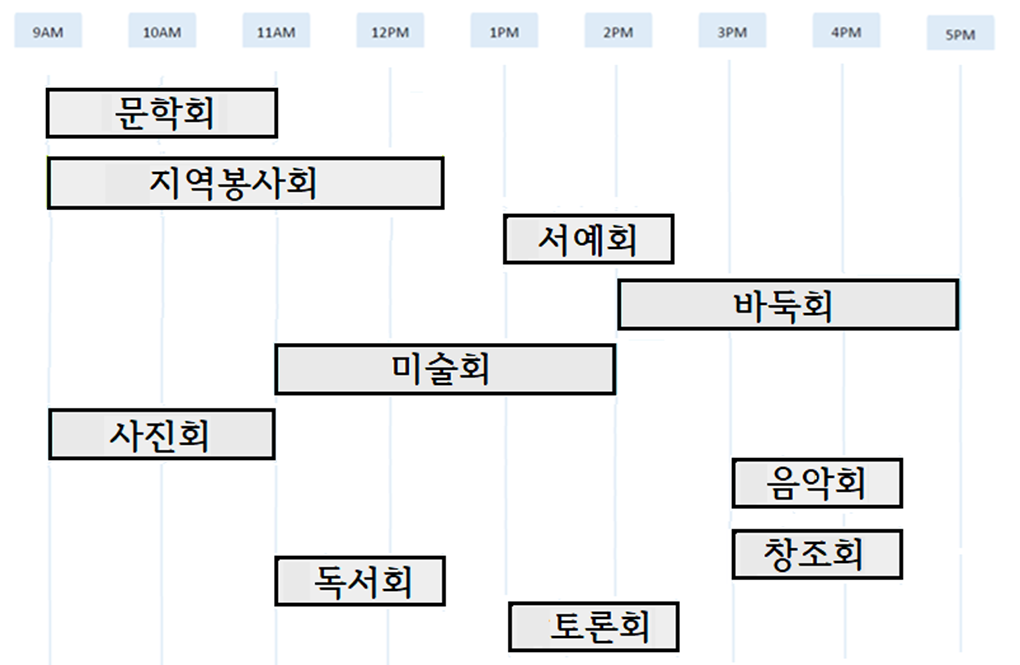

##### 구간 분할 알고리즘


In [7]:
# 알고리즘 구현하기\\


a = [['문학회', 9.0, 11.0], ['지역봉사회', 9.0, 12.5], ['서예회', 13.0, 14.5],
     ['바둑회', 14.0, 17.0], ['미술회', 11.0, 14.0], ['사진회', 9, 11.0],
     ['음악회', 15.0, 16.5], ['창조회', 15.0, 16.5], ['독서회', 11.0, 12.5], 
     ['토론회', 13.0, 14.5]]

n = len(a)
a.sort(key = lambda x: x[1])
solution = [[a[0]]]
finish_time = [a[0][2]]
k=0
for i in range(1,n):
    flag = False
    for j in range(k+1):
        if a[i][1] >=finish_time[j]:
            solution[j].append(a[i])
            finish_time[j] = a[i][2]
            flag = True
            break
    if not flag:    
        k += 1
        solution.append([a[i]])
        finish_time.append(a[i][2])

for i in range(k+1):
    print('미팅룸', i+1, ':', solution[i])


미팅룸 1 : [['문학회', 9.0, 11.0], ['미술회', 11.0, 14.0], ['바둑회', 14.0, 17.0]]
미팅룸 2 : [['지역봉사회', 9.0, 12.5], ['서예회', 13.0, 14.5], ['음악회', 15.0, 16.5]]
미팅룸 3 : [['사진회', 9, 11.0], ['독서회', 11.0, 12.5], ['토론회', 13.0, 14.5], ['창조회', 15.0, 16.5]]


##### 구간 분할 수행 시간

1. 정렬 : O(nlogn)
2. 하나씩 task를 가져다 배정 가능성을 검사 O(d), d는 미팅룸의 수
3. 총 시간 : O(nlogn) + O(d)*n 
            = O(nlogn) + O(dn)



## 초 증가 순서 (Super Increasing Sequence)
주어진 숫자들에 대해 각 숫자가 자신보다 앞선 숫자들의 합 보다 크면 이런 숫자들을 초 증가 순서라고 함  
[예] 거스름돈을 동전으로 받을 때의 알고리즘

## 최소 신장 트리 (Minimum Spanning Tree, MST) : Prim 알고리즘

## 최단 경로 찾기 : Dijkstra 알고리즘

## 허프만 코딩 (Huffman Coding)
그리디 알고리즘에 초점을 둔 대표적인 파일 압축 알고리즘

